In [223]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv
from collections import Counter

In [224]:
#Inizialization of useful stuff
index=['Short','Short/Medium','Medium','Medium/Long','Long','Very Long']
col=[]
months=[' ','January','February','March','April','May','June']
#Inizialization od dataframes
nycdf = pd.DataFrame(index=index, columns=col)
bronx_df = pd.DataFrame(index=index, columns=col)
brooklyn_df = pd.DataFrame(index=index, columns=col)
ewr_df = pd.DataFrame(index=index, columns=col)
manhattan_df = pd.DataFrame(index=index, columns=col)
queens_df = pd.DataFrame(index=index, columns=col)
staten_island_df = pd.DataFrame(index=index, columns=col)
unknown_df = pd.DataFrame(index=index, columns=col)

## New York Analysis

In [227]:
for i in range(1,7):
    #I use a for loop for pick data from each dataset
    M1=pd.read_csv("yellow_tripdata_2018-0"+str(i)+".csv" , encoding = 'latin-1')
    #Clean it saving only this column
    M2 = M1.filter(['tpep_pickup_datetime','tpep_dropoff_datetime', 'PULocationID'])
    #read the file with ID of each boroughs and merge it with the cleaned Df, after I removed the column PULocation ID
    #because we don't need it
    borough = pd.read_csv("taxi_zone_lookup.csv", encoding = 'latin-1')
    result = pd.merge(M2,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
    df=result.drop('PULocationID',axis=1)
    del result 
    #For each trip I compute the duration of the trip
    format_date='%Y-%m-%d %H:%M:%S'
    pickup=pd.to_datetime(df['tpep_pickup_datetime'].str.strip(),format=format_date)
    dropoff=pd.to_datetime(df['tpep_dropoff_datetime'].str.strip(), format=format_date)
    difference=(dropoff-pickup).astype('timedelta64[m]')
    df['Duration']=difference
    #Then I put each trip in a category
    l=[]
    for ele in df['Duration']:
        if ele<=10:
            l.append('Short')
        if 10<ele<=20:
            l.append('Short/Medium')
        if 20<ele<=30:
            l.append('Medium')
        if 30<ele<=40:
            l.append('Medium/Long')
        if 40<ele<=50:
            l.append('Long')
        if ele>50:
            l.append('Very Long')
            
    df['Trip type']=l
    #Now the date of pickup and dropoff are unnecessary so I remove them
    df=df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)
    
    #I compute the number of each trip, using the category
    d=Counter(l)
    c=[]
    for ind in index:
        if ind not in d:
            c.append(0)
        else:
            c.append(d[ind])
    nycdf[months[i]]=c

In [228]:
nycdf

,January,February,March,April,May,June
Short,4659268,4478160,4885675,4616870,4412217,4233733
Short/Medium,2689383,2628352,2866181,2892146,2877496,2711580
Medium,884029,869236,984822,1047933,1084813,1002209
Medium/Long,300755,298614,359627,393228,425440,381506
Long,115888,116005,158084,172589,193717,178363
Very Long,110551,101709,175987,182749,230380,206440


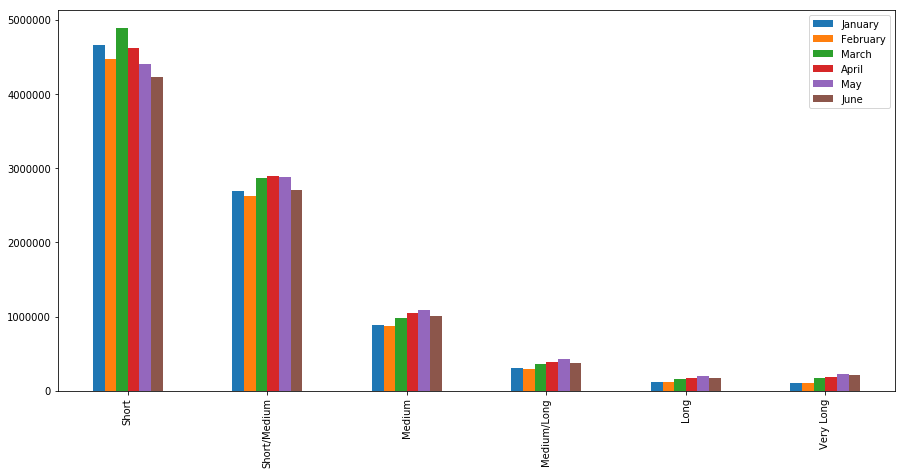

In [229]:
nycdf.plot.bar(figsize=(15,7))

# Boroughs

In [217]:
months=[' ','January','February','March','April','May','June']
bor=['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown']
for i in range(1,7):
    M1=pd.read_csv("yellow_tripdata_2018-0"+str(i)+".csv" , encoding = 'latin-1')
    #Clean it saving only this column
    
    M2 = M1.filter(['tpep_pickup_datetime','tpep_dropoff_datetime', 'PULocationID'])
    #read the file with ID of each boroughs and merge it with the cleaned Df, after I removed the column PULocation ID
    #because we don't need it
    
    borough = pd.read_csv("taxi_zone_lookup.csv", encoding = 'latin-1')
    result = pd.merge(M2,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
    df=result.drop('PULocationID',axis=1)
    del result 
    
    #For each trip I compute the duration of the trip
    format_date='%Y-%m-%d %H:%M:%S'
    pickup=pd.to_datetime(df['tpep_pickup_datetime'].str.strip(),format=format_date)
    dropoff=pd.to_datetime(df['tpep_dropoff_datetime'].str.strip(), format=format_date)
    difference=(dropoff-pickup).astype('timedelta64[m]')
    
    df['Duration']=difference
    s =df.loc[df['Borough'] == 'Unknown']
    #Then I put each trip in a category
    l=[]
    for ele in s['Duration']:
        if ele<=10:
            l.append('Short')
        if 10<ele<=20:
            l.append('Short/Medium')
        if 20<ele<=30:
            l.append('Medium')
        if 30<ele<=40:
            l.append('Medium/Long')
        if 40<ele<=50:
            l.append('Long')
        if ele>50:
            l.append('Very Long')
    s['Trip type']=l
    #Now the date of pickup and dropoff are unnecessary so I remove them
    s=s.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)
    #I compute the number of each trip, using the category
    d=Counter(l)
    c=[]
    for ind in index:
        if ind not in d:
            c.append(0)
        else:
            c.append(d[ind])
    bronx_df[months[i]]=c
    brooklyn_df[months[i]]=c
    ewr_df[months[i]]=c #Does't work
    manhattan_df[months[i]]=c
    queens_df[months[i]]=c
    staten_island_df[months[i]]=c #Doesn't work
    unknown_df[months[i]]=c

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [208]:
brooklyn_df

,January,February,March,April,May,June
Short,32103,45955,38850,38012,52515,17820
Short/Medium,13198,30537,16401,1108,17215,51972
Medium,48678,5418,57085,52628,39145,40081
Medium/Long,5384,12354,8480,9254,10490,10062
Long,393,456,946,16908,1875,1433
Very Long,494,381,1175,1164,1572,1593


In [209]:
bronx_df

,January,February,March,April,May,June
Short,3971,1822,4569,4156,4030,2658
Short/Medium,2166,3518,1067,2847,2845,1578
Medium,97,722,2794,379,1600,3759
Medium/Long,735,376,1348,1417,364,1491
Long,364,73,293,1342,1557,341
Very Long,56,55,259,297,477,387


In [212]:
manhattan_df

,January,February,March,April,May,June
Short,4443772,2470415,2691592,883582,4213517,4035487
Short/Medium,234368,4284500,4656164,4405450,2711092,345533
Medium,722696,720186,826596,2716396,929659,2552725
Medium/Long,2515644,30433,311808,46140,397060,854922
Long,18575,242419,50968,344840,39910,53613
Very Long,30648,19928,31540,32388,58745,36529


In [214]:
queens_df

,January,February,March,April,May,June
Short,93951,65716,76753,72874,73560,73620
Short/Medium,132770,85946,87015,91946,87847,80344
Medium,71559,123258,124752,130532,202101,195822
Medium/Long,170030,160653,188241,202207,67436,114998
Long,31829,20391,43879,48425,122724,55646
Very Long,26767,28557,44213,50340,57163,54317


In [218]:
unknown_df

,January,February,March,April,May,June
Short,45485,77923,90399,81030,36552,35751
Short/Medium,90656,39613,45897,15478,67809,68182
Medium,14609,12704,15706,42926,13634,6835
Medium/Long,6481,5738,1157,8144,7879,12966
Long,771,756,8092,1344,1620,1339
Very Long,909,668,1539,1134,1175,1198


In [219]:
d

Counter({'Short/Medium': 35751,
         'Short': 68182,
         'Medium/Long': 6835,
         'Medium': 12966,
         'Very Long': 1339,
         'Long': 1198})